# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context

url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data_disease=pd.read_csv(url)
data_disease.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


- **Age** возраст пациента
- **Gender** Пол пациента
- **Total Bilirubin** Общий билирубин
- **Direct Bilirubin** Прямой билирубин
- **Alkaline Phosphotase** Щелочная фосфотаза
- **Alamine Aminotransferase** Аламин аминотрансфераза
- **Aspartate Aminotransferase** Аспартат аминотрансфераза
- **Total Protiens** Всего протеина
- **Albumin** Альбумин
- **Albumin and Globulin Ratio** Соотношение альбумина и глобулина
- **Dataset:** Набор данных: поле, используемое для разделения данных на два набора (1- пациент с заболеванием печени или 2- без заболевания)

Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

In [7]:
data_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


общее кол-во записей - 583, в столбце Albumin_and_Globulin_Ratio есть нулевые значения, заполнено только 579 строк 

**1. Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.**

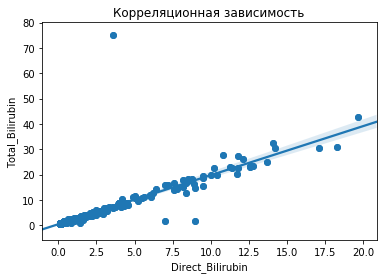

In [21]:
plt.scatter(data_disease['Direct_Bilirubin'], data_disease['Total_Bilirubin'])

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x=data_disease['Direct_Bilirubin'], y=data_disease['Total_Bilirubin'], data=data_disease, fit_reg=True)

plt.title('Корреляционная зависимость')
plt.show()

между атрибутами Direct_Bilirubin и Total_Bilirubin наблюдается линейная связь, корреляция прямая

In [3]:
direct_bilirubin = data_disease['Direct_Bilirubin']
total_bilirubin = data_disease['Total_Bilirubin']

In [4]:
#Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array
direct_bilirubin = np.array(direct_bilirubin).reshape(-1,1)
total_bilirubin = np.array(total_bilirubin).reshape(-1,1)

In [5]:
from sklearn.linear_model import LinearRegression

In [8]:
#Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.
model = LinearRegression()

In [6]:
from sklearn.model_selection import train_test_split

#Разделим на 80% тренировочных и на 20% тестовых

# x = total_bilirubin - известна
# y = direct_bilirubin - предсказываем
X_train, X_test, y_train, y_test = train_test_split(
    total_bilirubin,
    direct_bilirubin,
    test_size = 0.2
)

In [9]:
#Обучим модель с помощью fit() метода
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)

In [11]:
#Посчитаем ошибку модели
#model.score - подсчет среднеквадратичной ошибки
model.score(X_test, y_test)

0.946029959452177

94% точности на тестовых данных

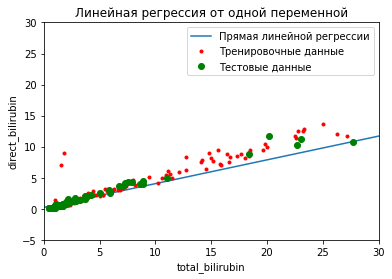

In [25]:
#Построим график линейной регресии

plt.xlabel('total_bilirubin')
plt.ylabel('direct_bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 30, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,30)
plt.ylim(-5,30)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

В данном случае получается прямая зависимость двух переменных Direct_Bilirubin и Total_Bilirubin:
- чем больше общий билирубин Total_Bilirubin, тем больше прямой билирубин Direct_Bilirubin

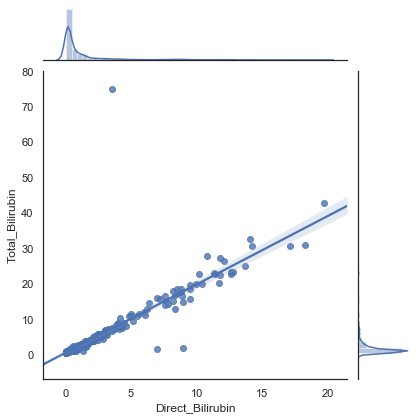

In [27]:
#Jointplot
#'Совместное распределение по двум переменным Total_Bilirubin и Direct_Bilirubin
direct_bilirubin = data_disease['Direct_Bilirubin']
total_bilirubin = data_disease['Total_Bilirubin']

sns.set(style="white", color_codes=True)
g = sns.jointplot(x=direct_bilirubin, y=total_bilirubin, data=data_disease, kind='reg')

plt.show()

**2. Посчитать квартили для всех колонок.**

In [4]:
#основные статистики
data_disease.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
#квартили распределения
data_disease.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


In [18]:
print('Age - возраст')
print("Q1 нижняя квартиль: ", np.quantile(data_disease.Age, .25))
print("Q2 медиана: ", np.quantile(data_disease.Age, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Age, .75)) 
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Age, .75)) - float(np.quantile(data_disease.Age, .25))) 

Age - возраст
Q1 нижняя квартиль:  33.0
Q2 медиана:  45.0
Q3 верхняя квартиль:  58.0
IQR межквартильный размах:  25.0


атрибут 'Gender - пол' величина категориальная, квартили не вычисляются

In [19]:
print('Total_Bilirubin - общий билирубин')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Total_Bilirubin, .25))
print("Q2 медиана: ", np.quantile(data_disease.Total_Bilirubin, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Total_Bilirubin, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Total_Bilirubin, .75)) - float(np.quantile(data_disease.Total_Bilirubin, .25))) 

Total_Bilirubin - общий билирубин
Q1 нижняя квартиль:   0.8
Q2 медиана:  1.0
Q3 верхняя квартиль:  2.6
IQR межквартильный размах:  1.8


In [20]:
print('Direct Bilirubin - прямой билирубин')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Direct_Bilirubin, .25))
print("Q2 медиана: ", np.quantile(data_disease.Direct_Bilirubin, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Direct_Bilirubin, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Direct_Bilirubin, .75)) - float(np.quantile(data_disease.Direct_Bilirubin, .25))) 

Direct Bilirubin - прямой билирубин
Q1 нижняя квартиль:   0.2
Q2 медиана:  0.3
Q3 верхняя квартиль:  1.3
IQR межквартильный размах:  1.1


In [22]:
print('Alkaline_Phosphotase - щелочная фосфотаза')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Alkaline_Phosphotase, .25))
print("Q2 медиана: ", np.quantile(data_disease.Alkaline_Phosphotase, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Alkaline_Phosphotase, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Alkaline_Phosphotase, .75)) - float(np.quantile(data_disease.Alkaline_Phosphotase, .25))) 

Alkaline_Phosphotase - щелочная фосфотаза
Q1 нижняя квартиль:   175.5
Q2 медиана:  208.0
Q3 верхняя квартиль:  298.0
IQR межквартильный размах:  122.5


In [4]:
print('Alamine_Aminotransferase - Аламин аминотрансфераза')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Alamine_Aminotransferase, .25))
print("Q2 медиана: ", np.quantile(data_disease.Alamine_Aminotransferase, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Alamine_Aminotransferase, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Alamine_Aminotransferase, .75)) - float(np.quantile(data_disease.Alamine_Aminotransferase, .25))) 

Alamine_Aminotransferase - Аламин аминотрансфераза
Q1 нижняя квартиль:   23.0
Q2 медиана:  35.0
Q3 верхняя квартиль:  60.5
IQR межквартильный размах:  37.5


In [5]:
print('Aspartate_Aminotransferase - Аспартат аминотрансфераза')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Aspartate_Aminotransferase, .25))
print("Q2 медиана: ", np.quantile(data_disease.Aspartate_Aminotransferase, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Aspartate_Aminotransferase, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Aspartate_Aminotransferase, .75)) - float(np.quantile(data_disease.Aspartate_Aminotransferase, .25))) 

Aspartate_Aminotransferase - Аспартат аминотрансфераза
Q1 нижняя квартиль:   25.0
Q2 медиана:  42.0
Q3 верхняя квартиль:  87.0
IQR межквартильный размах:  62.0


In [6]:
print('Total_Protiens - Всего протеина')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Total_Protiens, .25))
print("Q2 медиана: ", np.quantile(data_disease.Total_Protiens, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Total_Protiens, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Total_Protiens, .75)) - float(np.quantile(data_disease.Total_Protiens, .25))) 

Total_Protiens - Всего протеина
Q1 нижняя квартиль:   5.8
Q2 медиана:  6.6
Q3 верхняя квартиль:  7.2
IQR межквартильный размах:  1.4000000000000004


In [7]:
print('Albumin - Альбумин')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Albumin, .25))
print("Q2 медиана: ", np.quantile(data_disease.Albumin, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Albumin, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Albumin, .75)) - float(np.quantile(data_disease.Albumin, .25))) 

Albumin - Альбумин
Q1 нижняя квартиль:   2.6
Q2 медиана:  3.1
Q3 верхняя квартиль:  3.8
IQR межквартильный размах:  1.1999999999999997


In [12]:
print('Albumin_and_Globulin_Ratio - Соотношение альбумина и глобулина')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Albumin_and_Globulin_Ratio, .25))
print("Q2 медиана: ", np.quantile(data_disease.Albumin_and_Globulin_Ratio, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Albumin_and_Globulin_Ratio, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Albumin_and_Globulin_Ratio, .75)) - float(np.quantile(data_disease.Albumin_and_Globulin_Ratio, .25))) 

Albumin_and_Globulin_Ratio - Соотношение альбумина и глобулина
Q1 нижняя квартиль:   nan
Q2 медиана:  nan
Q3 верхняя квартиль:  nan


заполним пустые ячейки у атрибута 'Albumin_and_Globulin_Ratio' средним значением

In [14]:
data_disease['Albumin_and_Globulin_Ratio'].fillna(data_disease['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [15]:
print('Albumin_and_Globulin_Ratio - Соотношение альбумина и глобулина')
print("Q1 нижняя квартиль:  ", np.quantile(data_disease.Albumin_and_Globulin_Ratio, .25))
print("Q2 медиана: ", np.quantile(data_disease.Albumin_and_Globulin_Ratio, .50)) 
print("Q3 верхняя квартиль: ", np.quantile(data_disease.Albumin_and_Globulin_Ratio, .75))
print("IQR межквартильный размах: ", float(np.quantile(data_disease.Albumin_and_Globulin_Ratio, .75)) - float(np.quantile(data_disease.Albumin_and_Globulin_Ratio, .25))) 

Albumin_and_Globulin_Ratio - Соотношение альбумина и глобулина
Q1 нижняя квартиль:   0.7
Q2 медиана:  0.9470639032815201
Q3 верхняя квартиль:  1.1
IQR межквартильный размах:  0.40000000000000013


**3. Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?**

Dataset: пациент с болезнью печени - 1, пациент не болеет - 2

In [4]:
#люди, возрастом до 50 лет
data_before_50 = data_disease[ data_disease['Age']<=50 ]

In [14]:
len(data_before_50)

376

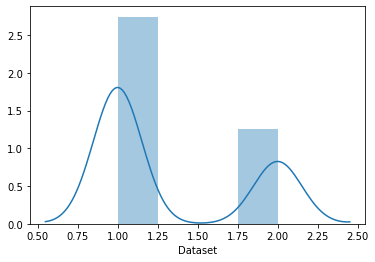

In [5]:
#гистограммы распределения Dataset
sns_plot1 = sns.distplot(data_before_50['Dataset'])
fig1 = sns_plot1.get_figure()

In [11]:
print("люди, возрастом до 50 лет (наличие или отсутствие болезни)")
print("сред. значение: ", data_before_50['Dataset'].mean())
print("Q2 медиана: ", np.quantile(data_before_50.Dataset, .50))

люди, возрастом до 50 лет
сред. значение:  1.3138297872340425
Q2 медиана:  1.0


In [8]:
#люди, возрастом после 50 лет
data_after_50 = data_disease[ data_disease['Age']>50 ]

In [15]:
len(data_after_50)

207

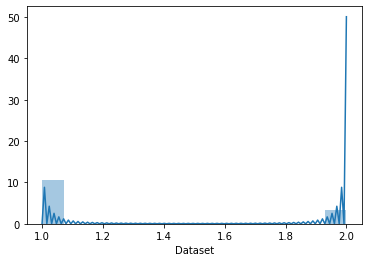

In [9]:
#гистограммы распределения Dataset
sns_plot2 = sns.distplot(data_after_50['Dataset'])
fig2 = sns_plot2.get_figure()

In [12]:
print("люди, возрастом после 50 лет (наличие или отсутствие болезни)")
print("сред. значение: ", data_after_50['Dataset'].mean())
print("Q2 медиана: ", np.quantile(data_after_50.Dataset, .50))

люди, возрастом после 50 лет (наличие или отсутствие болезни)
сред. значение:  1.2367149758454106
Q2 медиана:  1.0


в возрасте до 50 и после 50 примерно одинаково болееют

**4. Посчитать одновыборочный t-критерий для выборки по Total_Bilirubin у больных людей. Как показатель помогает понять, что выборка не похожа на генеральную совокупность?**

T-test используют для определения, насколько среднее исследуемой выборки статистически отличается от среднего значения генеральной совокупности.

* Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности. (выборка похожа на ген.совокупность)
* Альтернативная гипотеза - среднее значение выборки отличается от среднего значения генеральной совокупности. (выборка отличается от ген.совокупности)

In [22]:
#ген.совокупность
data_all = data_disease['Total_Bilirubin']

In [17]:
#выборка людей с заболеванием
data_yes = data_disease[ data_disease['Dataset']==1 ]['Total_Bilirubin']

In [18]:
#кол-во в выборке
len(data_yes)

416

In [23]:
#t-test Стьдента одновыборочный
stats.ttest_1samp(data_yes, data_all.mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

alpha = 0.05, N=415

t-value=2.471063305746647, сравниваем с табличным значением 2.00 (или число от 1.97 до 2, так как нет 415 в таблице)

Так как значение t-value превышает 2.00, то отвергаем нулевую гипотезу и принимаем альтернативную

или

вероятность того, что получили такие или еще больше выраженные различия абсолютно случайно равна pvalue=0.013871861207640042

так как pvalue < 0.05, то отвергаем нулевую гипотезу и принимаем альтернативную - Total_Bilirubin у больных людей отличается.

In [38]:
0.013871861207640042<0.05

True

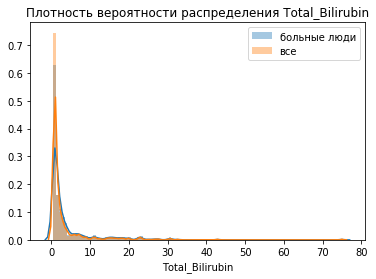

In [42]:
sns.distplot(data_yes,100)
sns.distplot(data_all,100)

plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные люди', 'все'])
plt.show()

при построении графика вероятности выборки и генеральной совокупности, визуально различий не наблюдается, а тест показал, что есть различия

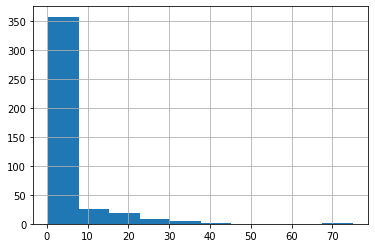

In [30]:
data_yes.hist()

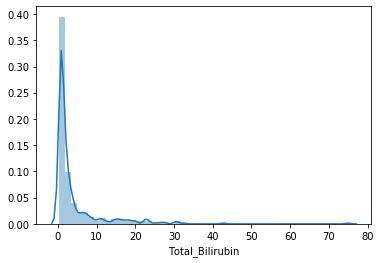

In [34]:
#гистограммы распределения выборки
sns_plot_yes = sns.distplot(data_yes)
fig_yes = sns_plot_yes.get_figure()

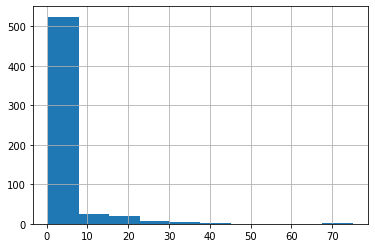

In [31]:
data_all.hist()

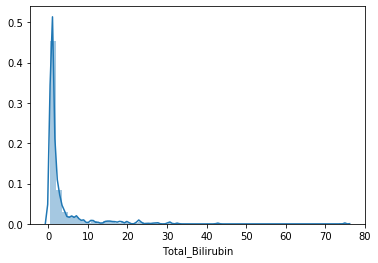

In [35]:
#гистограммы распределения ген.совокупности
sns_plot_all = sns.distplot(data_all)
fig_all = sns_plot_all.get_figure()

**5. Посчитать критерий t для двух выборок: больные и здоровые (по Total_Bilirubin). Имеют ли данные группы схожесть?**

Двухвыборочный t-критерий для независимых выборок
t-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся.

In [54]:
#выборка людей с заболеванием
data_yes = data_disease[ data_disease['Dataset']==1 ]['Total_Bilirubin']

In [55]:
#выборка здоровых людей
data_no = data_disease[ data_disease['Dataset']==2 ]['Total_Bilirubin']

In [52]:
#t-test Стьдента Двухвыборочный для независимых выборок
stats.ttest_ind(data_yes, data_no)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

p-value равно 7.80, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистически значимого различия в показаниях 'Total_Bilirubin' у здоровых и больных людей, то есть данные группы схожи.

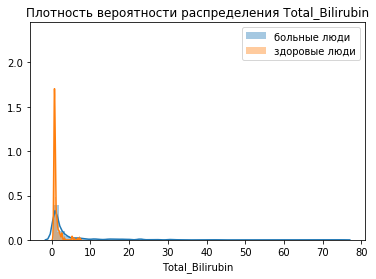

In [56]:
sns.distplot(data_yes,50)
sns.distplot(data_no,50)

plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные люди', 'здоровые люди'])
plt.show()

**6. Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).**

In [60]:
#люди, возрастом от 1 до 30 лет
data_1 = data_disease[ data_disease['Age']<=30 ]['Dataset']
#люди, возрастом от 30 до 55 лет
data_2 = data_disease[ (data_disease['Age']>30) & (data_disease['Age']<=55)]['Dataset']
#люди, возрастом после 55 лет
data_3 = data_disease[ data_disease['Age']>55 ]['Dataset']

In [61]:
#Множественный тест (ANOVA)
stats.f_oneway(data_1, data_2, data_3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу и принимаем альтернативную

то есть, у разных возрастных групп имеются различия по наличию заболевания.